In [1]:
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import *
from brainmri.runner.train import train_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp

In [2]:
config = {
     'make_stacks': True,
     'stack_size': 3,
     'data_dir': './data/lgg-mri-segmentation/kaggle_3m/',
     'out_dir': './data/lgg-mri-segmentation/2.5D/StackSize=3',
     'model_out_pth': './models/fpn-resnext50_aug_{date}.pth',
     'augmentations': True,
     'epochs': 75,
     'batch_size': 64,
     'lr': 5e-05,
     'optimizer': 'adam',
     'model': 'fpn',
     'model_encoder': 'resnext50_32x4d',
     'model_act': 'sigmoid',
     'encoder_weights': 'imagenet',
     'device': 'cuda',
     'num_classes': 1
}

In [3]:
stacker = MriStacker(root_dir=config.get("data_dir"),
                         out_dir=config.get("out_dir"),
                         stack_size=config.get("stack_size"))

if config.get("make_stacks"):
    stacker.process_patients()

stacker.gen_train_val_test_split()


preprocessing_fn = get_preprocessing_fn(config.get("model_encoder"), config.get("encoder_weights"))
train_ds = BrainMriSegmentation(stacker.train_df, config.get("stack_size"),
                                transforms=get_augmentations(is_train=True, apply_transforms=config.get("augmentations")),
                                preprocessing=get_preprocessing(preprocessing_fn))
valid_ds = BrainMriSegmentation(stacker.valid_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))

train_dl = get_dataloader(train_ds, bs=config.get("batch_size"))
valid_dl = get_dataloader(valid_ds, bs=config.get("batch_size"))

train_loss, val_loss, train_fscore, val_fscore, train_iou, val_iou  = train_model(config, train_dl, valid_dl)


/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


Training fpn w/ resnext50_32x4d backbone
Let's use 2 GPUs!

Epoch: 0
valid: 100%|██████████| 10/10 [00:02<00:00,  4.36it/s, dice_loss - 0.6747, iou_score - 0.2103, fscore - 0.3471]
Model saved!

Epoch: 1
valid: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s, dice_loss - 0.4509, iou_score - 0.4103, fscore - 0.5809]
Model saved!

Epoch: 2
valid: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s, dice_loss - 0.3762, iou_score - 0.4731, fscore - 0.6413]
Model saved!

Epoch: 3
valid: 100%|██████████| 10/10 [00:02<00:00,  3.63it/s, dice_loss - 0.3455, iou_score - 0.5082, fscore - 0.6725]
Model saved!

Epoch: 4
valid: 100%|██████████| 10/10 [00:05<00:00,  2.15it/s, dice_loss - 0.266, iou_score - 0.5955, fscore - 0.746] 
Model saved!

Epoch: 5
valid: 100%|██████████| 10/10 [00:02<00:00,  3.84it/s, dice_loss - 0.2445, iou_score - 0.6235, fscore - 0.7675]
Model saved!

Epoch: 6
valid: 100%|██████████| 10/10 [00:02<00:00,  3.52it/s, dice_loss - 0.2201, iou_score - 0.6574, fscore - 0.793]
Model saved

valid: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s, dice_loss - 0.1419, iou_score - 0.7586, fscore - 0.8626]

Epoch: 34
valid: 100%|██████████| 10/10 [00:02<00:00,  4.10it/s, dice_loss - 0.1433, iou_score - 0.7569, fscore - 0.8611]

Epoch: 35
valid: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s, dice_loss - 0.1384, iou_score - 0.7644, fscore - 0.8658]

Epoch: 36
valid: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s, dice_loss - 0.1458, iou_score - 0.7528, fscore - 0.8584]

Epoch: 37
valid: 100%|██████████| 10/10 [00:02<00:00,  4.24it/s, dice_loss - 0.1383, iou_score - 0.7637, fscore - 0.8657]

Epoch: 38
valid: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s, dice_loss - 0.1246, iou_score - 0.7847, fscore - 0.879]
Model saved!

Epoch: 39
valid: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s, dice_loss - 0.1428, iou_score - 0.757, fscore - 0.8612]

Epoch: 40
valid: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s, dice_loss - 0.1273, iou_score - 0.7803, fscore - 0.8763]

Epoch: 41
valid

valid: 100%|██████████| 10/10 [00:02<00:00,  4.19it/s, dice_loss - 0.1121, iou_score - 0.8026, fscore - 0.8903]
Model saved!

Epoch: 69
valid: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s, dice_loss - 0.1271, iou_score - 0.7803, fscore - 0.8757]

Epoch: 70
valid: 100%|██████████| 10/10 [00:02<00:00,  4.31it/s, dice_loss - 0.1193, iou_score - 0.7919, fscore - 0.8836]

Epoch: 71
valid: 100%|██████████| 10/10 [00:02<00:00,  4.13it/s, dice_loss - 0.1169, iou_score - 0.7956, fscore - 0.886]

Epoch: 72
valid: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s, dice_loss - 0.1145, iou_score - 0.799, fscore - 0.8882]

Epoch: 73
valid: 100%|██████████| 10/10 [00:02<00:00,  3.77it/s, dice_loss - 0.1185, iou_score - 0.7932, fscore - 0.8839]

Epoch: 74
valid: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s, dice_loss - 0.1184, iou_score - 0.7926, fscore - 0.8841]


In [4]:
import torch.nn
best_model = torch.load("./models/fpn-resnext50_aug_2021-08-23.pth")

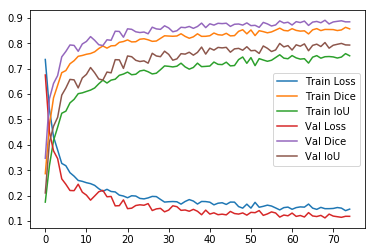

In [5]:
plt.plot(train_loss)
plt.plot(train_fscore)
plt.plot(train_iou)
plt.plot(val_loss)
plt.plot(val_fscore)
plt.plot(val_iou)                                                                                

plt.legend(["Train Loss",  "Train Dice", "Train IoU", "Val Loss", "Val Dice", "Val IoU"])

In [6]:
test_ds = BrainMriSegmentation(stacker.test_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=config.get("batch_size"))

In [7]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Fscore(threshold=0.5)]
    
test_epoch =  smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=config.get("device"),
    verbose=True
)

In [8]:
test_epoch.run(test_dl)

valid: 100%|██████████| 6/6 [00:01<00:00,  4.19it/s, dice_loss - 0.1229, iou_score - 0.786, fscore - 0.8796] 


{'dice_loss': 0.12287192543347676,
 'iou_score': 0.7860147456328074,
 'fscore': 0.8796101113160452}